In [1]:
#### Problem Statement


###xyz Co's 2014-1018 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. Use these insights to optimise pricing, promotions and market expansion for sustainable growth and reduced concentration.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
sheets=pd.read_excel('C:/Users/user/Downloads/Sales-Analysis-main/Sales-Analysis-main/Regional Sales Dataset.xlsx',sheet_name=None)
###This will create a dictionary "sheets" where the keys are the sheet names(like "Sales Orders","Customers"'etc and values are the data frames)


In [6]:
print(sheets.keys())

dict_keys(['Sales Orders', 'Customers', 'Regions', 'State Regions', 'Products', '2017 Budgets'])


In [7]:
for sheet_name in sheets.keys():
    print(f" '{sheet_name}' ")

 'Sales Orders' 
 'Customers' 
 'Regions' 
 'State Regions' 
 'Products' 
 '2017 Budgets' 


In [8]:
#Assign Data Frames to each sheets

df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_products=sheets['Products']
df_regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_budgets=sheets['2017 Budgets']

In [9]:
df_sales.shape

(64104, 12)

In [10]:
print("df_sales shape:",(df_sales.shape))
print("df_customers shape:",(df_customers.shape))
print("df_products shape:",(df_products.shape))
print("df_regions shape:",(df_regions.shape))
print("df_state_reg shape:",(df_state_reg.shape))
print("df_budgets shape:",(df_budgets.shape))


df_sales shape: (64104, 12)
df_customers shape: (175, 2)
df_products shape: (30, 2)
df_regions shape: (994, 15)
df_state_reg shape: (49, 3)
df_budgets shape: (30, 2)


In [11]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [12]:
df_sales.head(5)


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [13]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [14]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [15]:
new_header=df_state_reg.loc[0]
df_state_reg.columns=new_header
df_state_reg.head(5)

,State Code,State,Region
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [16]:
df_state_reg=df_state_reg[1:].reset_index(drop=True)
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [17]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [18]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [19]:
##Null Value Check


In [20]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [21]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [22]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [23]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [24]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [25]:
##Data Cleaning and Wrangling
##Merge sales with customers 

In [26]:
df=df_sales.merge(
   df_customers,
   how='left',
   left_on='Customer Name Index',
   right_on='Customer Index'
)

In [27]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [28]:
##Merge with Products

In [29]:
df=df.merge(df_products,
                  how='left',
                  left_on='Product Description Index',
                  right_on='Index'
                 )
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [30]:
#Merge with Regions


In [31]:
df=df.merge(df_regions,
                  how='left',
                  left_on='Delivery Region Index',
                  right_on='id'
                 )
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [32]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone'],
      dtype='object')

In [33]:
#Merge with state regions

In [34]:
df=df.merge(df_state_reg[["State Code", "Region"]],
                  how='left',
                  left_on='state_code',
                  right_on='State Code'
                 )
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [35]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'Region'],
      dtype='object')

In [36]:
#Merge with budgets
df=df.merge(df_budgets,
            how='left',
            left_on='Product Name',
            right_on='Product Name'
           )
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [37]:
df_budgets.columns

Index(['Product Name', '2017 Budgets'], dtype='object')

In [38]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'Region', '2017 Budgets'],
      dtype='object')

In [39]:
df.to_csv('file.csv')

In [40]:
df_state_reg.columns

Index(['State Code', 'State', 'Region'], dtype='object', name=0)

In [41]:
#Deletion of Duplicate Columns

In [42]:
#Customer Index
#Index
#id
#State Code

#Clean up redundant columns
cols_to_drop= ['Customer Index','Index','id','State Code']
df=df.drop(columns=cols_to_drop,errors='ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [43]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Names', 'Product Name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'Region', '2017 Budgets'],
      dtype='object')

In [44]:
#Convert all columns to lower case
df.columns=df.columns.str.lower()

In [45]:
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [46]:
#Delete those columns that we don't need and keep the important columns
cols_to_keep=['ordernumber','orderdate','customer names','channel','product name','order quantity','unit price',
              'line total','total unit cost','state_code','county','state','region','latitude','longitude','2017 budgets']

In [47]:
df=df[cols_to_keep]

In [48]:
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [49]:
#Rename the columns
df=df.rename(columns={
    'ordernumber':'order number',
    'orderdate':'order_date',
    'customer names':'customer_name',
    'product name':'product_name',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total_unit_cost':'cost',
    'state_code':'state',
    'state':'state_name',
    'latitude':'lat',
    '2017 budgets':'budget'
}
            )
df.head(1)
  


,order number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,longitude,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231


In [50]:
#Blank out budgets for non 2017 orders
df.loc[df['order_date'].dt.year!=2017,'budget']=pd.NA
#line total is revenue
df[['order_date','product_name','revenue','budget']]
df.head(5)

,order number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,longitude,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [51]:
df.to_csv('final.csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  longitude        64104 non-null  float

In [53]:
#Filter the dataset to include only records from year 2017
df_2017=df[df['order_date'].dt.year==2017]

In [54]:
df.isnull().sum()

order number           0
order_date             0
customer_name          0
channel                0
product_name           0
order_quantity         0
unit_price             0
revenue                0
total unit cost        0
state                  0
county                 0
state_name             0
region                 0
lat                    0
longitude              0
budget             48841
dtype: int64

In [55]:
df_2017

,order number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,longitude,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2017-12-31,Zooveo Company,Wholesale,Product 1,9,984.9,8864.1,512.148,MO,Jackson County/Clay County,Missouri,Midwest,39.08547,-94.35210,3016489.209
61622,SO - 0004785,2017-12-31,Wordware Company,Wholesale,Product 3,12,201.0,2412.0,90.450,PA,Philadelphia County,Pennsylvania,Northeast,39.95234,-75.16379,2642352.432
61623,SO - 0004950,2017-12-31,Dynazzy Company,Distributor,Product 6,9,3825.7,34431.3,3098.817,FL,Volusia County,Florida,South,29.13832,-80.99561,1672229.416
61624,SO - 0006829,2017-12-31,Pixoboo Corp,Distributor,Product 6,5,1835.8,9179.0,972.974,CT,New Haven County,Connecticut,Northeast,41.22509,-73.06111,1672229.416


In [56]:
df['total_cost']=df['order_quantity']*df['total unit cost']
df['profit']=df['revenue']-df['total_cost']
df['profit_margin_percentage']=df['profit']/df['revenue']*100
df.head(5)

,order number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,longitude,budget,total_cost,profit,profit_margin_percentage
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


In [57]:
df.columns

Index(['order number', 'order_date', 'customer_name', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'state', 'county', 'state_name', 'region', 'lat',
       'longitude', 'budget', 'total_cost', 'profit',
       'profit_margin_percentage'],
      dtype='object')

In [58]:
## EDA

In [59]:
##Target Variable (y)

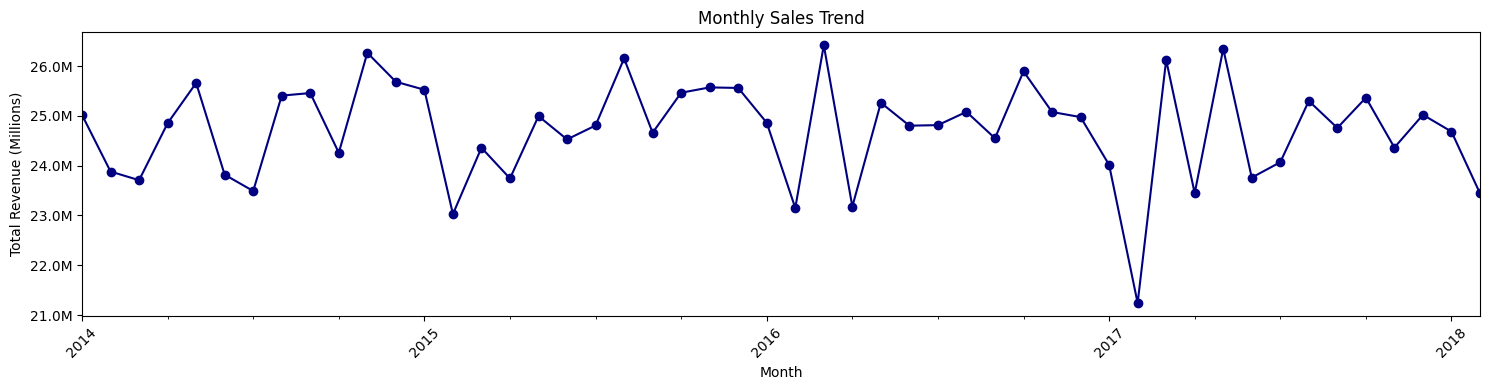

In [60]:
df['order_month']=df['order_date'].dt.to_period('M')

monthly_sales=df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

monthly_sales.plot(marker='o',color='navy')

from matplotlib.ticker import FuncFormatter
formatter= FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()





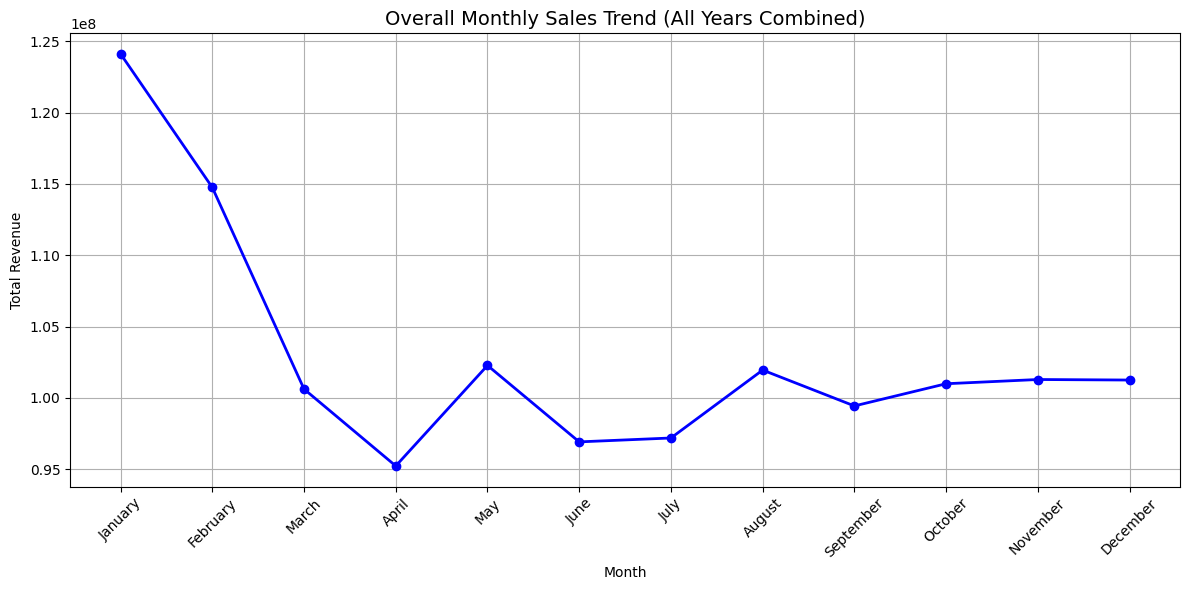

In [61]:
# Extract month name and month number for sorting
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.strftime('%B')

 
# Group by month and aggregate revenue
monthly_sales = df.groupby(['month','month_name'])['revenue'].sum().reset_index()

# Sort by month number to ensure correct calendar order
monthly_sales = monthly_sales.sort_values('month')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month_name'], monthly_sales['revenue'], marker='o', color='blue', linewidth=2)
plt.title('Overall Monthly Sales Trend (All Years Combined)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
df_new=df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]

C:\Users\user\AppData\Local\Temp\ipykernel_2188\999957245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df['order_date'].dt.month
C:\Users\user\AppData\Local\Temp\ipykernel_2188\999957245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month_name'] = df['order_date'].dt.strftime('%B')


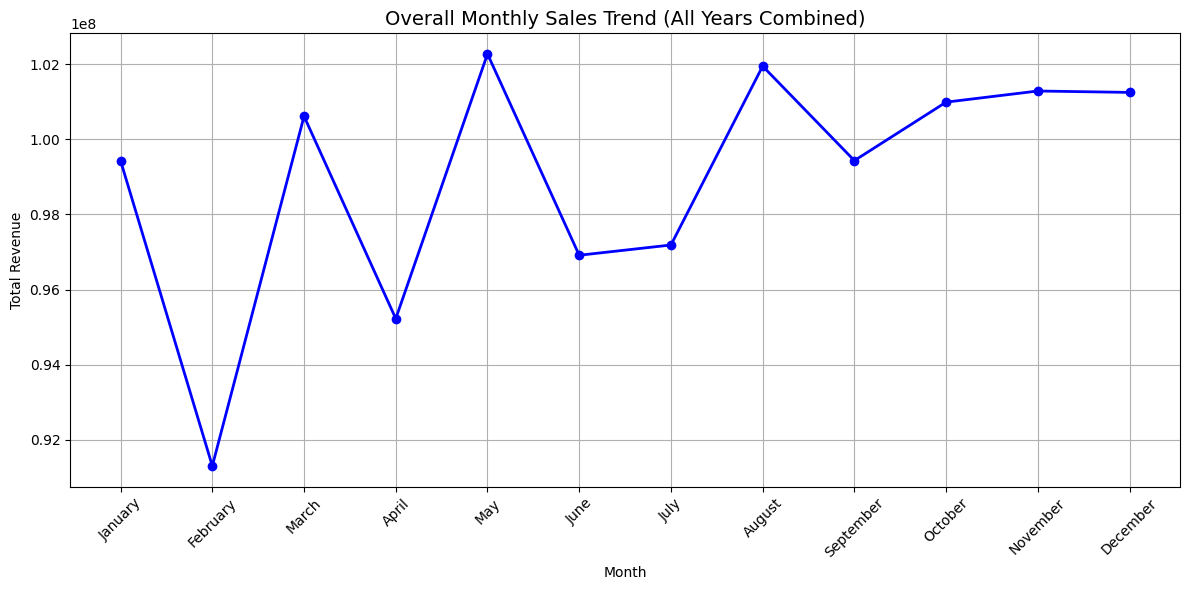

In [63]:
df_new['month'] = df['order_date'].dt.month
df_new['month_name'] = df['order_date'].dt.strftime('%B')

 
# Group by month and aggregate revenue
monthly_sales = df_new.groupby(['month','month_name'])['revenue'].sum().reset_index()

# Sort by month number to ensure correct calendar order
monthly_sales = monthly_sales.sort_values('month')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month_name'], monthly_sales['revenue'], marker='o', color='blue', linewidth=2)
plt.title('Overall Monthly Sales Trend (All Years Combined)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
#Top 10 products by revenue

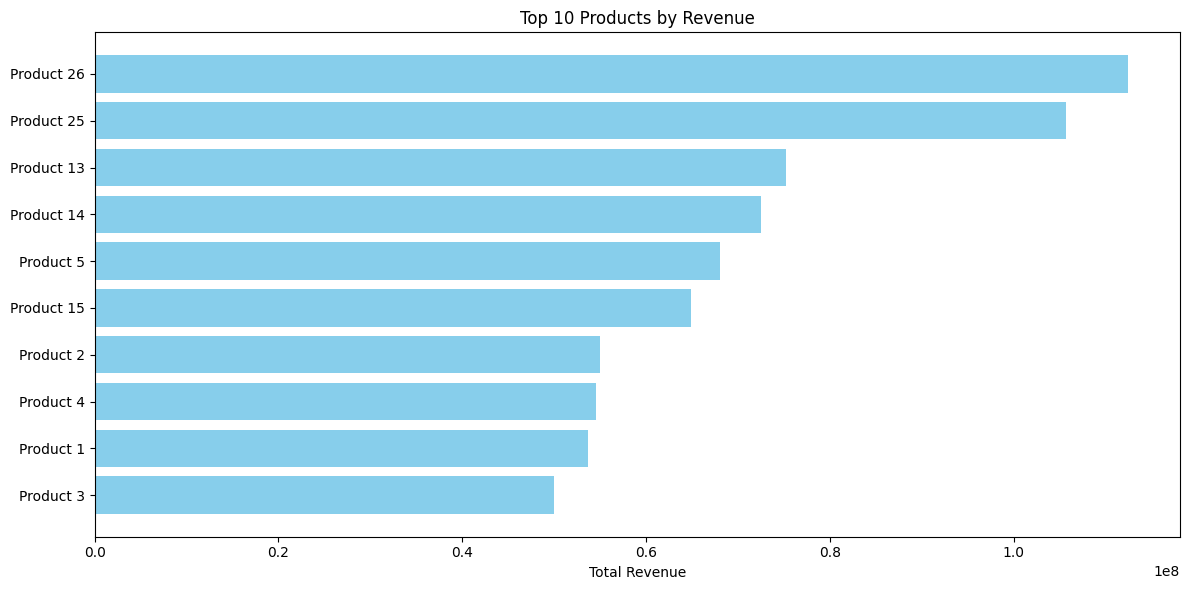

In [65]:
# Group by product name and sum revenue
top_products = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Sort and get top 10
top_products = top_products.sort_values(by='revenue', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_products['product_name'], top_products['revenue'], color='skyblue')
plt.xlabel('Total Revenue')
plt.title('Top 10 Products by Revenue')
plt.gca().invert_yaxis()  # Highest revenue at top
plt.tight_layout()
plt.show()

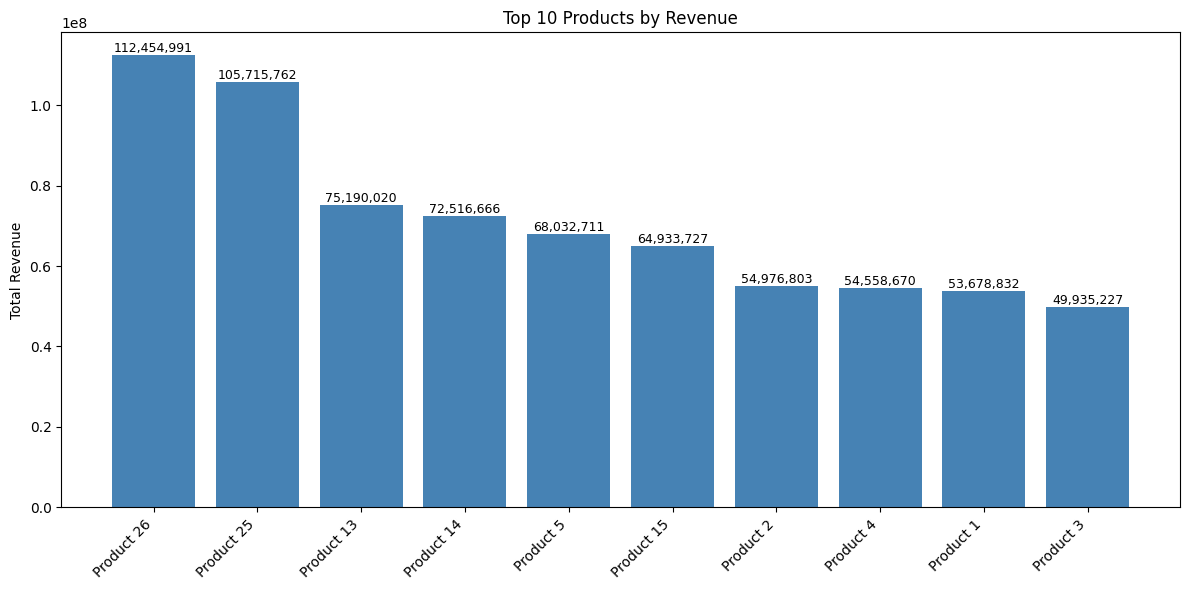

In [66]:
# Group by product name and sum revenue
top_products = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Sort and get top 10
top_products = top_products.sort_values(by='revenue', ascending=False).head(10)

# Plot vertical bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_products['product_name'], top_products['revenue'], color='steelblue')

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}', 
             ha='center', va='bottom', fontsize=9)

# Formatting
plt.ylabel('Total Revenue')
plt.title('Top 10 Products by Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [67]:
##Sales by channel

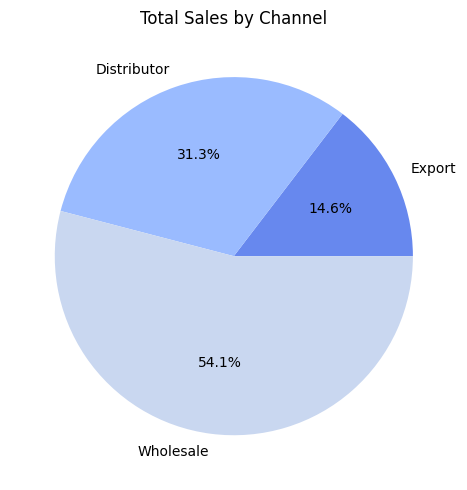

In [68]:
chan_sales=df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)
plt.title('Total Sales by Channel')

plt.tight_layout()

plt.show()

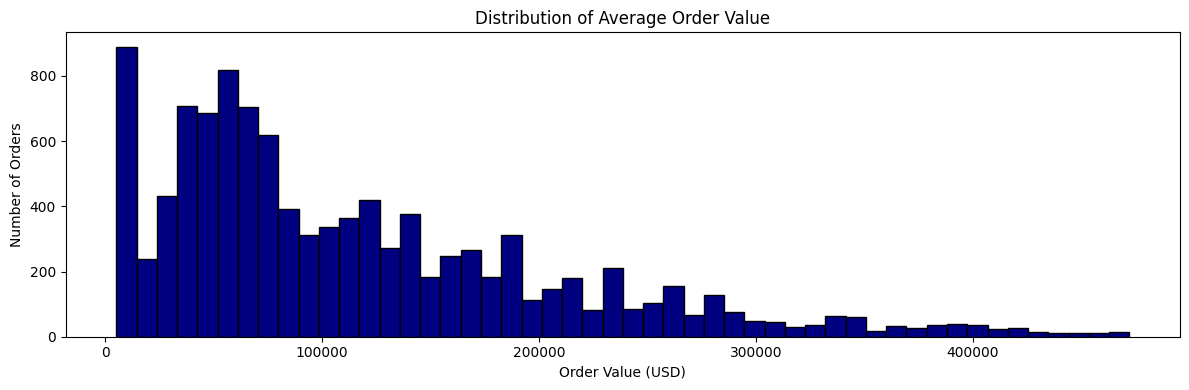

In [69]:
## Average Order Value (ADV) Distribution

adv=df.groupby('order number')['revenue'].sum()

plt.figure(figsize=(12,4))

plt.hist(
    adv,
    bins=50,
    color='navy',
    edgecolor='black'
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()

plt.show()

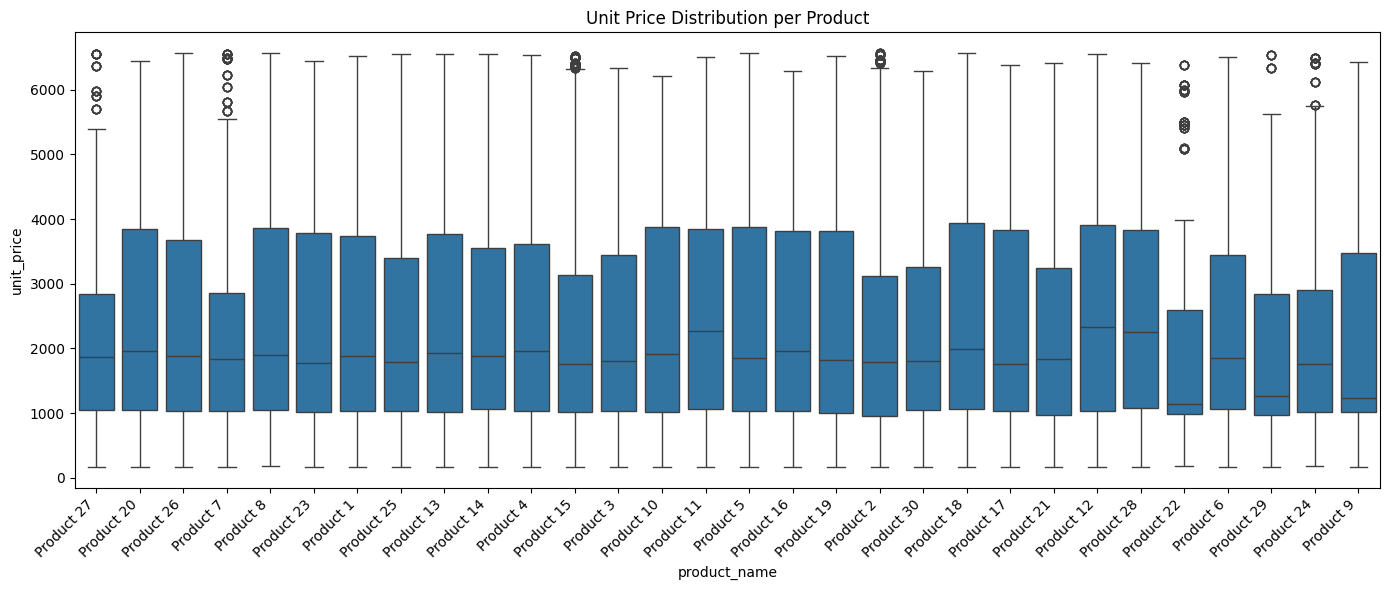

In [70]:
# Unit Price Distribution per Product
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_new, x='product_name', y='unit_price')
plt.xticks(rotation=45, ha='right')
plt.title('Unit Price Distribution per Product')
plt.tight_layout()
plt.show()


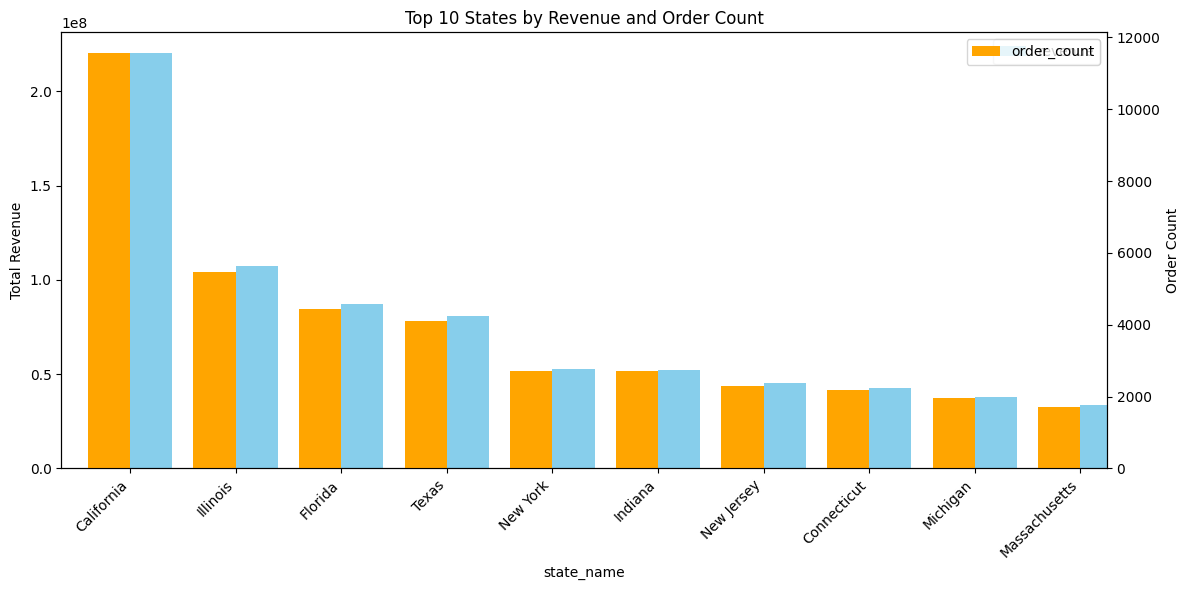

In [71]:
#Top 10 States by Revenue and Order Count
# Group by state
state_summary = df_new.groupby('state_name').agg({
    'revenue': 'sum',
    'order number': 'count'
}).rename(columns={'order number': 'order_count'}).reset_index()

# Sort and get top 10 by revenue
top_states = state_summary.sort_values(by='revenue', ascending=False).head(10)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

top_states.plot(kind='bar', x='state_name', y='revenue', ax=ax1, color='skyblue', position=0, width=0.4)
top_states.plot(kind='bar', x='state_name', y='order_count', ax=ax2, color='orange', position=1, width=0.4)

ax1.set_ylabel('Total Revenue')
ax2.set_ylabel('Order Count')
plt.title('Top 10 States by Revenue and Order Count')
ax1.set_xticklabels(top_states['state_name'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2188\2530246570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_margin, x='channel', y='profit_margin_percentage', palette='viridis')


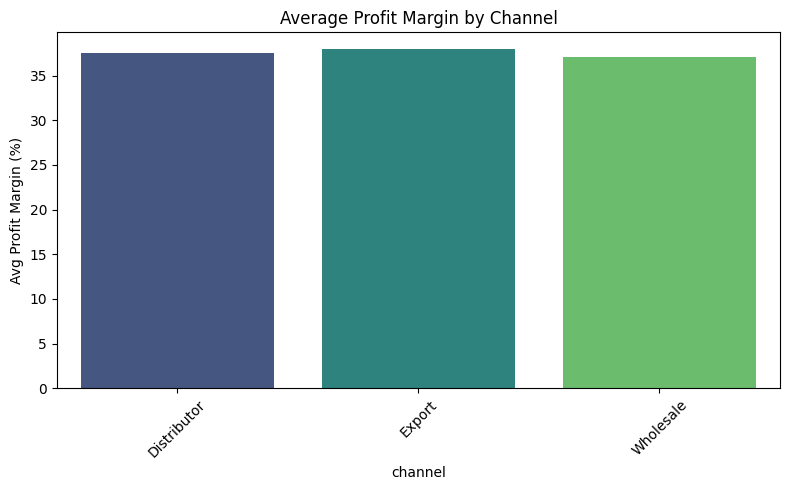

In [72]:
#Average Profit Margin by Channel
avg_margin = df_new.groupby('channel')['profit_margin_percentage'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_margin, x='channel', y='profit_margin_percentage', palette='viridis')
plt.title('Average Profit Margin by Channel')
plt.ylabel('Avg Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2188\2364396180.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='revenue', y='customer_name', ax=axes[0], palette='Blues_r')
C:\Users\user\AppData\Local\Temp\ipykernel_2188\2364396180.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_customers, x='revenue', y='customer_name', ax=axes[1], palette='Reds')


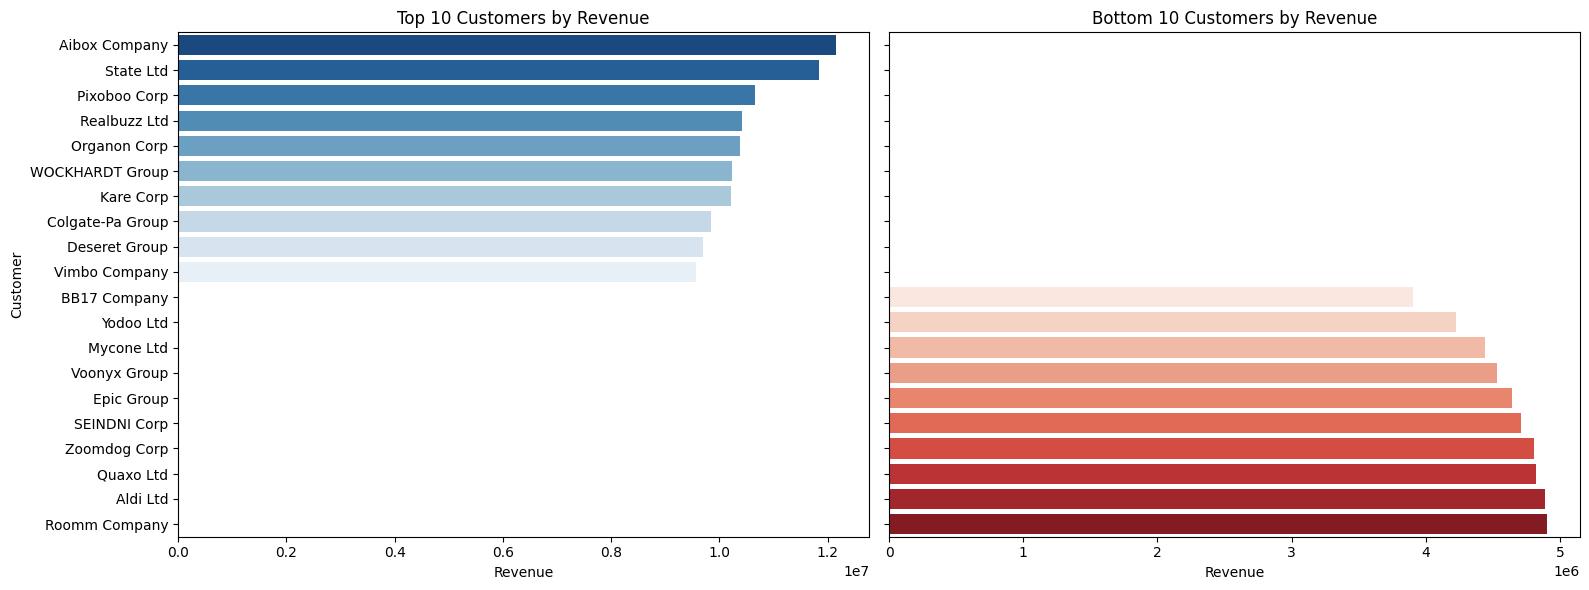

In [73]:
#Top and Bottom 10 Customers by Revenue
# Group by customer
customer_revenue = df_new.groupby('customer_name')['revenue'].sum().reset_index()

# Sort
top_customers = customer_revenue.sort_values(by='revenue', ascending=False).head(10)
bottom_customers = customer_revenue.sort_values(by='revenue', ascending=True).head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.barplot(data=top_customers, x='revenue', y='customer_name', ax=axes[0], palette='Blues_r')
axes[0].set_title('Top 10 Customers by Revenue')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Customer')

sns.barplot(data=bottom_customers, x='revenue', y='customer_name', ax=axes[1], palette='Reds')
axes[1].set_title('Bottom 10 Customers by Revenue')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


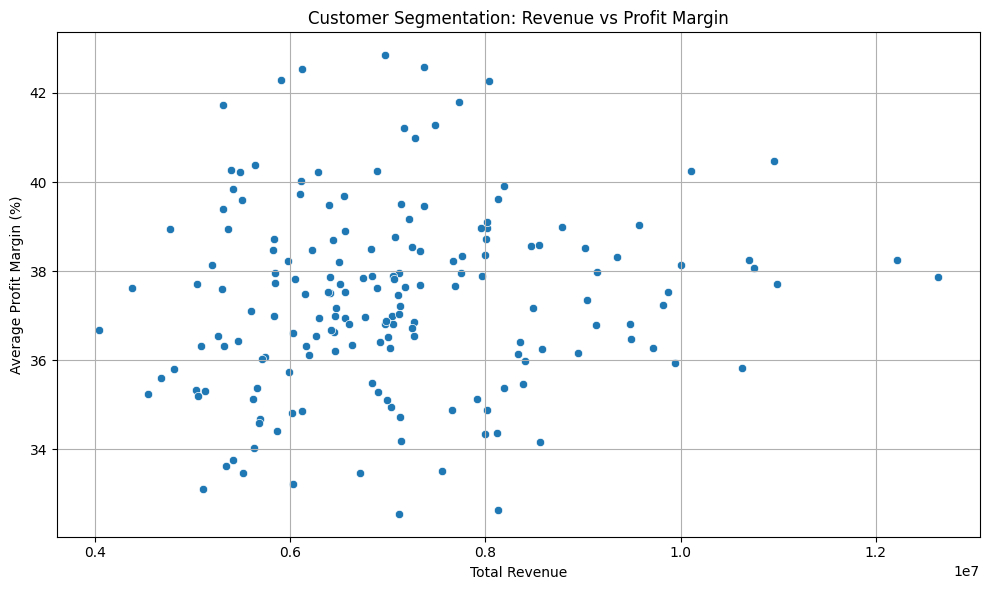

In [74]:
#Customer Segmentation:Revenue vs Profit Margin
# Group by customer for revenue and average margin
customer_summary = df.groupby('customer_name').agg({
    'revenue': 'sum',
    'profit_margin_percentage': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_summary, x='revenue', y='profit_margin_percentage')
plt.title('Customer Segmentation: Revenue vs Profit Margin')
plt.xlabel('Total Revenue')
plt.ylabel('Average Profit Margin (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

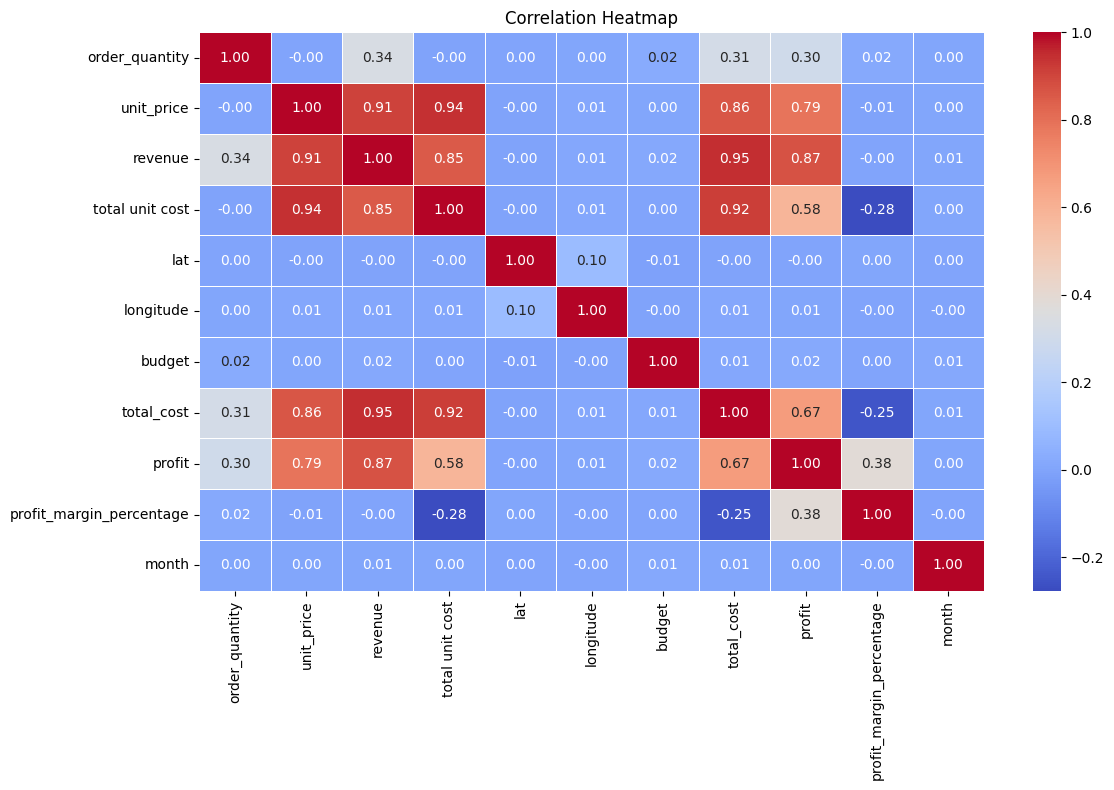

In [75]:
#Correlation Heatmap
# Select numeric columns
numeric_df = df_new.select_dtypes(include='number')

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [76]:
#Channel Distribution: 54%Wholesale, 31% Distribution, 15% Exports
#Monthly Revenue Cycle: May peaks at 1.02 billion Dolars

In [ ]:
df_new.to_csv('FINALS.csv')